# Project Census Data

This project aims to analyze a small town's census data and provide insights to help the local 
government determine the optimal use of an unoccupied plot of land and prioritize 
investments in community services. The analysis began with a comprehensive data cleaning 
process, which involved identifying and correcting errors in the dataset, all conducted using 
Jupyter Notebook, an Integrated Development Environment. The analysis results are then 
presented, offering key insights to support informed decision-making. Finally, based on these 
findings, recommendations on investment and resource allocation are provided.


### Brief Overview of dataset
- The mock census that you will work with has been simulated using the Faker package in Python. It has
been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census
of the UK wherein only a few questions were asked of the population. The fields recorded are as follows:
- 1. Street Number (this is set to 1 if it is a unique dwelling);
- 2. Street Name;
- 3. First Name of occupant;
- 4. Surname of occupant;
- 5. Age of occupant;
- 6. Relationship to the Head of the household (anyone aged over 18 can be a “Head” – they
are simply the person who had the responsibility to fill in the census details);
- 7. Marital status (one of: Single, Married, Divorced, Widowed, or “N/A” in the case of
minors);
- 8. Gender (one of: Male, Female; note that other responses were not implemented in 1881);
- 9. Occupation (this field was implemented in a modern style, rather than typical 1881
occupations);
- 10. Infirmity (we have implemented a limited set of infirmities following the style of 1881);
- 11. Religion (we have implemented a set of real-world religions)

## Part One: Data Cleaning 

### Aims of this analysis
- Thorough Data Cleaning and Discovery of insights
- Preparation against further analysis
- Analysis of relevant data to draw insights that inform investment planning

In [1]:
# import the necessary libraries for cleaning and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load unique dataset
df = pd.read_csv("T1_A24census7.csv")

In [3]:
# returns the first five rows in the dataframe
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,West Port,Sam,Jones,36,Head,Single,Male,"Engineer, communications",NaN,No Religion
1,1,West Port,Debra,Andrews,33,Partner,Single,Female,Planning and development surveyor,NaN,No Religion
2,2,West Port,Helen,Smith,44,Head,Married,Female,Historic buildings inspector/conservation officer,NaN,No Religion
3,2,West Port,Martin,Smith,46,Husband,Married,Male,Visual merchandiser,NaN,No Religion
4,2,West Port,Charlene,Smith,10,Daughter,NaN,Female,Student,NaN,No Religion


## Exploratory Data Analysis 
- Examine columns
- Get information on the entire Dataframe
- Check the percentage of missing values
- Explore the dataset per column for inconsistent data values and missing values or strings.
- Clean all general errors with the appropriate values
- Perform data imputation where necessary

In [4]:
# examine column names 
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [5]:
# information on the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11082 non-null  int64 
 1   Street                         11082 non-null  object
 2   First Name                     11082 non-null  object
 3   Surname                        11068 non-null  object
 4   Age                            11082 non-null  int64 
 5   Relationship to Head of House  10308 non-null  object
 6   Marital Status                 8397 non-null   object
 7   Gender                         11082 non-null  object
 8   Occupation                     11082 non-null  object
 9   Infirmity                      141 non-null    object
 10  Religion                       9708 non-null   object
dtypes: int64(2), object(9)
memory usage: 952.5+ KB


In [6]:
# check the total number of missing values per column
df.isnull().sum()

House Number                         0
Street                               0
First Name                           0
Surname                             14
Age                                  0
Relationship to Head of House      774
Marital Status                    2685
Gender                               0
Occupation                           0
Infirmity                        10941
Religion                          1374
dtype: int64

In [7]:
# check the percentage of missing values per column 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing.round(2).astype(str) + '%'
})

print(missing_value_df)


                                                 column_name percent_missing
House Number                                    House Number            0.0%
Street                                                Street            0.0%
First Name                                        First Name            0.0%
Surname                                              Surname           0.13%
Age                                                      Age            0.0%
Relationship to Head of House  Relationship to Head of House           6.98%
Marital Status                                Marital Status          24.23%
Gender                                                Gender            0.0%
Occupation                                        Occupation            0.0%
Infirmity                                          Infirmity          98.73%
Religion                                            Religion           12.4%


In [8]:
# explore dataset for duplicate values
df.duplicated().sum()

0

## Data Cleaning of Missing and Inconsistent Values Per Column
- This section is dedicated to cleaning the Null values in this dataset that have identified and accorded a percentage
- The cleaned data will be further employed in the final analysis to make informed decisions
- The data cleaning is iterative and approaches each column with null or inconsistent values.
- Other columns are subsequently evaluated for any other 'unclean' values or data format. 

## Surname 
- Check the datatype
- Examine Unique values in this column
- Make informed assumptions based on other columns where appropriate
- Examine the total number of null or missing values
- Perform Data Imputation of missing Surnames

In [9]:
# examine the datatype of 'Surname' column
print(df['Surname'].dtypes)

object


In [10]:
# check unique values in 'Surname' column
df['Surname'].unique()

array(['Jones', 'Andrews', 'Smith', 'Bull', 'Rice', 'Ross', 'Wyatt',
       'Morgan', 'Baxter', 'Davies', 'Bruce', 'Douglas', 'Townsend',
       'Stanley', 'Burton', 'Roberts', 'Price', 'Williamson', "O'Neill",
       'Hawkins', 'Mason', 'Simpson', 'Reid', 'Black', 'Schofield',
       'Stone', 'Brown', 'Thompson', 'Williams', 'Ali', 'Clark',
       'Goddard', 'Taylor', 'Thomson', 'Henderson', 'Thomas', 'Ashton',
       'Edwards', 'Gray', 'Hughes', 'Marshall-Gray', 'Lewis', 'Carroll',
       'Turnbull', 'Kent', 'Holmes', 'Read', 'Payne', 'Hancock', 'Turner',
       'Miller', 'Burke', 'Griffiths', 'Cook', 'Franklin', 'Dale',
       'Rowley', 'Johnson', 'Williams-Johnson', 'Nelson', 'Young',
       'Miles', 'Warren', 'Tomlinson', 'Walton', 'Carpenter', 'Hewitt',
       'Murphy', 'Bevan', 'Crawford', 'Evans', 'Warner', 'Patel',
       'Howell', 'Robertson', 'Butler', 'Carr', 'Freeman', 'Dawson',
       'Hill', 'Owen', 'Marsh-Owen', 'Donnelly', 'Duffy', 'Barlow',
       'Richards', 'Webster

In [11]:
# check for NaN values in 'Surname' Column
df['Surname'].isnull().sum()

14

In [12]:
# Identify rows with missing surnames
missing_surnames = df[df['Surname'].isna()]

# Analyze relationships in rows with missing surnames
missing_surnames_with_relationship = missing_surnames[['House Number', 'Street', 'First Name', 'Relationship to Head of House']]

# Display the results
print("Rows with missing surnames:")
print(missing_surnames_with_relationship)

Rows with missing surnames:
       House Number          Street First Name Relationship to Head of House
266              19    Oaktree Keys     Steven                       Husband
349               3     Roman Walks      Clive                       Husband
1416              8        Fox Wall      Karen                          Wife
1472             40        Fox Wall     Nathan                       Husband
2736             44  Roberts Summit        Guy                       Husband
4617              8     Smith Forks     Rachel                          Wife
5056              5   Turner Radial     Gerald                       Husband
5329            110   Turner Radial     Angela                          Wife
5692             25   Morgan Manors     Eileen                          Wife
7073             25      Beaver Via     Jeremy                       Husband
7656             10   Winter Street      Louis                       Husband
7791             19    Holmes Coves     Jordan  

In [13]:
# Ensure all members of a house have the same surname as the "Head"
def fill_missing_surnames(group):
    head_surname = group.loc[group['Relationship to Head of House'] == 'Head', 'Surname'].iloc[0]
    group['Surname'] = group['Surname'].fillna(head_surname)
    return group

# Group by 'House Number' and 'Street', apply the function, and reset the index
df = (
    df.groupby(['House Number', 'Street'], as_index=False)
    .apply(fill_missing_surnames)
    .reset_index(drop=True)
)

# Output the updated DataFrame
print("Updated DataFrame with missing surnames filled:")
df

Updated DataFrame with missing surnames filled:


C:\Users\hp\AppData\Local\Temp\ipykernel_14904\1917587818.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_missing_surnames)


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Aberdeen Road,Katherine,Clayton,33,Head,Married,Female,Firefighter,NaN,Christian
1,1,Aberdeen Road,Carl,Clayton,34,Husband,Married,Male,"Engineer, petroleum",NaN,No Religion
2,1,Aberdeen Road,Kieran,Clayton,2,Son,NaN,Male,Child,NaN,No Religion
3,1,Aberdeen Road,Danny,Brown,53,Lodger,Single,Male,Cytogeneticist,NaN,No Religion
4,1,Aberdeen Road,Mandy,Wilson,23,Lodger,Single,Female,Bookseller,NaN,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
11077,228,Unity Lane,Sam,Roberts,57,Husband,Married,Male,"Engineer, broadcasting (operations)",NaN,No Religion
11078,228,Unity Lane,Nathan,Roberts,22,Son,Widowed,Male,University Student,NaN,No Religion
11079,229,Unity Lane,Teresa,Greenwood,37,Head,Married,Female,Contractor,NaN,Christian
11080,229,Unity Lane,Anthony,Greenwood,37,Husband,Married,Male,Unemployed,NaN,Christian


In [14]:
# check if NaN values still exist
df['Surname'].isnull().sum()

0

## Relationship to Head of House Column
In this secton, I will attempt to accomplish the following: 

- Check for NaN or Inconsistent values in this column
- Examine Unique values in this column
- Evaluate the count of unique values
- Make informed assumptions based on other columns where appropriate
- Examine the total number of null or missing values
- Fill the NaN values with informed assumptions based on correlation or relationship with other columns
- Where appropriate, I will fill with 'unknown' values

In [15]:
# sum of NaN values in 'Relationship to Head of House' column
df['Relationship to Head of House'].isnull().sum()

774

In [16]:
# examine the unique values in 'Relationship to Head of House' column
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Son', 'Lodger', nan, 'Grandson', 'Daughter',
       'Wife', 'Partner', 'Visitor', 'Adopted Daughter', 'Granddaughter',
       'Adopted Grandson', 'Nephew', 'Adopted Son', 'Cousin', 'Sibling',
       'Step-Daughter', 'Step-Son', 'Niece', 'Daughter-in-law'],
      dtype=object)

In [17]:
# check the value counts of the unique values in the 'Relationship to Head of House' column.
val_count = df['Relationship to Head of House']
val_count.value_counts()

Relationship to Head of House
Head                3701
Son                 2007
Daughter            1861
Husband             1127
Lodger               454
Wife                 379
Partner              324
Granddaughter         96
Grandson              94
Sibling               68
Visitor               40
Cousin                38
Step-Daughter         26
Step-Son              26
Nephew                19
Adopted Son           18
Adopted Daughter      14
Niece                 14
Adopted Grandson       1
Daughter-in-law        1
Name: count, dtype: int64

In [18]:
# check for nan values where age is less than 18 
df[(df['Relationship to Head of House'].isnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9677,100,Smith Forks,Kayleigh,Walker,0,NaN,Single,Female,Child,NaN,NaN
10023,118,Testament Brook,Laura,Campbell-Gibson,15,NaN,NaN,Female,Student,NaN,Christian


In [19]:
# update the Nan with the appropriate values
df.loc[4192, 'Relationship to Head of House'] = "Step Daughter"
df.loc[4771, 'Relationship to Head of House'] = "Adopted Daughter"

In [20]:
# check if the data frame has changed and nan cleaned 
df[(df['Relationship to Head of House'].isnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9677,100,Smith Forks,Kayleigh,Walker,0,NaN,Single,Female,Child,NaN,NaN
10023,118,Testament Brook,Laura,Campbell-Gibson,15,NaN,NaN,Female,Student,NaN,Christian


In [21]:
# dataframe where Relationship to Head of House is Null and Occupation is University Student
# and Marital Status is 'Married', 'Single', 'Divorced' or 'Widowed'
# returned 173 rows

df[(df['Relationship to Head of House'].isnull()) & (df['Occupation'] == 'University Student') 
       & (df['Marital Status'].isin(['Married','Single', 'Widowed', 'Divorced']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
265,1,Marsden Isle,Alexandra,Moss,19,NaN,Single,Female,University Student,NaN,Christian
328,1,Oaktree Keys,Francesca,Burke,20,NaN,Single,Female,University Student,NaN,Muslim
336,1,Patel Lakes,Gerald,Wilson,18,NaN,Single,Male,University Student,NaN,Christian
337,1,Patel Lakes,Garry,Wood,18,NaN,Single,Male,University Student,NaN,NaN
338,1,Patel Lakes,Keith,Stanley,19,NaN,Single,Male,University Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
11014,207,Unity Lane,Jayne,Moss,22,NaN,Single,Female,University Student,NaN,No Religion
11038,214,Unity Lane,Christine,Bradshaw,21,NaN,Single,Female,University Student,NaN,Muslim
11039,214,Unity Lane,Natasha,Fletcher,18,NaN,Single,Female,University Student,NaN,Christian
11074,227,Unity Lane,Jane,Harvey,21,NaN,Single,Female,University Student,NaN,Christian


In [22]:
# for individuals who meet this condition
# assign lodger 
df.loc[
    (df['Relationship to Head of House'].isnull()) &
    (df['Occupation'] == 'University Student') &
    (df['Marital Status'].isin(['Married', 'Single', 'Widowed', 'Divorced'])),
    'Relationship to Head of House'
] = 'Lodger'


In [23]:
# cehck if those who meet this condition still exists
df[(df['Relationship to Head of House'].isnull()) & (df['Occupation'] == 'University Student') 
       & (df['Marital Status'].isin(['Married','Single', 'Widowed', 'Divorced']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [24]:
import random

def infer_relationships(group):
    head = group[group["Relationship to Head of House"] == "Head"]
    
    if not head.empty:
        head_index = head.index[0]
        head_age = group.loc[head_index, "Age"]
        head_gender = group.loc[head_index, "Gender"]
        head_surname = group.loc[head_index, "Surname"]  # Get the head's surname
        
        for idx, row in group.iterrows():
            if pd.isna(row["Relationship to Head of House"]): 
                # Check if they share the same surname as the head of the house
                if row["Surname"] == head_surname:
                    # If their age is 19 years younger than the head's age, assign "Son" or "Daughter"
                    if row["Age"] <= head_age - 19:
                        if row["Gender"] == "Male":
                            group.at[idx, "Relationship to Head of House"] = "Son"
                        elif row["Gender"] == "Female":
                            group.at[idx, "Relationship to Head of House"] = "Daughter"
                else:
                    # If they have a different surname, assign "Lodger" or "Visitor" randomly based on age 
                    if row["Age"] > head_age:
                        group.at[idx, "Relationship to Head of House"] = random.choice(["Lodger", "Visitor"])
                    else:
                        group.at[idx, "Relationship to Head of House"] = "Visitor"
    else:
        # If no "Head" exists, assign "Visitor" to all NaN relationships
        group.loc[group["Relationship to Head of House"].isna(), "Relationship to Head of House"] = "Visitor"
    
    return group

# Apply the inference logic to each group, modifying the 'Relationship to Head of House' column in place
df = df.groupby(["House Number", "Street"], group_keys=False).apply(infer_relationships)

# Assign default "Unknown" to any remaining NaN values
df["Relationship to Head of House"].fillna("unknown", inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_14904\3021270167.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["House Number", "Street"], group_keys=False).apply(infer_relationships)
C:\Users\hp\AppData\Local\Temp\ipykernel_14904\3021270167.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(val

In [25]:
# check if the Relationship to Head of House is clean
df['Relationship to Head of House'].isnull().sum()

0

## 'Marital Status' Column
In this secton, I will attempt to accomplish the following: 

- Check for NaN values in this column
- Examine Unique values in this column
- Evaluate the count of unique values
- Make informed assumptions based on other columns where appropriate
- Examine the total number of null or missing values
- Fill the NaN values with informed assumptions based on correlation or relationship with other columns

In [26]:
# Unique values in Marital Status
df['Marital Status'].unique()

array(['Married', nan, 'Single', 'Divorced', 'Widowed'], dtype=object)

In [27]:
# sum of Na values in Marital Status
df['Marital Status'].isna().sum()

2685

In [28]:
# assign pandas series to a variable called 'mar_df'
mar_df = df['Marital Status']

# examine the value count of unique values in the 'Marital Status' column.
mar_df.value_counts()

Marital Status
Single      3912
Married     3061
Divorced    1027
Widowed      397
Name: count, dtype: int64

In [29]:
# examine the length of individuals under 18 who have Nan Values 
count_under_18_nan = df[(df['Age'] < 18) & (df['Marital Status'].isnull())]
len(count_under_18_nan)

2685

In [30]:
# assign N/A for under 18 who are labeled 'married', 'divorced' or 'widowed'
df.loc[df['Age'] < 18, 'Marital Status'] = 'Underage'

In [31]:
# check if the 'Marital Status' column still contains NaN values
df['Marital Status'].isna().sum()

0

# 'Age' Column 
In this section, I will examine the age distribution thorouhly for anomalies

- Plot an Age histogram
- Examine the distribution of ages

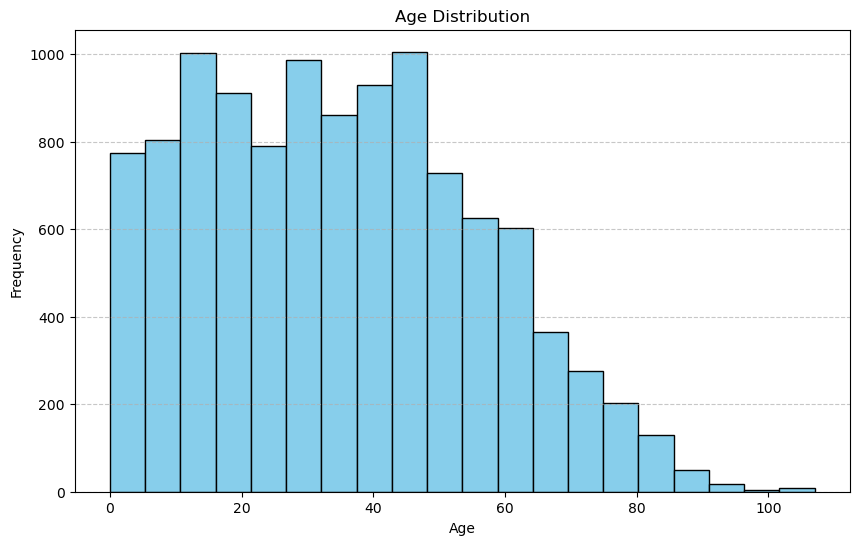

In [32]:
# Plot histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
# examine outliers in 'Age'
outliers = df[(df['Age'] > 120)]
outliers

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [34]:
df['Age'].isnull().sum()

0

## 'Religion' Column
In this secton, I will attempt to accomplish the following: 

- Examine the total number of null or missing values
- Examine Unique values in this column
- Evaluate the count of unique values
- Examine and correct unrealistic or fake religions
- Fill the NaN values with informed assumptions based on correlation or relationship with other columns
- Adhere to the standards of 2021 Census Religions which are - Christian, Muslim, Buddhist, Hindu, Jewish, Muslim, Sikh, Other Religion, and No Religion


In [35]:
# examine the unique values in 'Religion' column.
df['Religion'].unique()

array(['Christian', 'No Religion', 'Muslim', nan, 'Hindu', 'Sikh',
       'Church of England', 'European', 'Humanist', 'Catholic',
       'The Antivan Crows', 'Agnostic', 'Bahai', 'Roman', 'Buddist'],
      dtype=object)

In [36]:
# assign pandas series to a variable called 'rel_df
rel_df = df['Religion']

rel_df.value_counts() # examine the value count of unique values in the 'Religion' column.

Religion
Christian            4821
No Religion          4598
Muslim                147
Hindu                  88
Sikh                   39
Agnostic                4
Church of England       2
Humanist                2
Catholic                2
European                1
The Antivan Crows       1
Bahai                   1
Roman                   1
Buddist                 1
Name: count, dtype: int64

In [37]:
# replace all unrealistic religions to 'Other' according to 2021 Census data

# use replace () method
df['Religion'] = df['Religion'].replace([
    'Church of England', 'European', 'Catholic',
    'The Antivan Crows', 'Bahai', 'Roman'
], 'Other')


In [38]:
df['Religion'].unique()

array(['Christian', 'No Religion', 'Muslim', nan, 'Hindu', 'Sikh',
       'Other', 'Humanist', 'Agnostic', 'Buddist'], dtype=object)

In [39]:
# correct wrong spelling of buddist 
df['Religion'] = df['Religion'].replace(['Buddist'], 'Buddhist')

In [40]:
df['Religion'].unique()

array(['Christian', 'No Religion', 'Muslim', nan, 'Hindu', 'Sikh',
       'Other', 'Humanist', 'Agnostic', 'Buddhist'], dtype=object)

In [41]:
# check total number of missing values in 'Religion' column
df['Religion'].isna().sum()

1374

In [42]:
# check total number of missing values when age less than 18
len(df[(df['Age'] < 18) & (df['Religion'].isnull())])

1284

In [43]:
# Function to assign religion based on head of house
def assign_religion(group):
    head = group[group["Relationship to Head of House"] == "Head"]
    
    if not head.empty:
        head_religion = head["Religion"].iloc[0]
        
        for idx, row in group.iterrows():
            if pd.isna(row["Religion"]):
                if row["Age"] < 18:
                    group.at[idx, "Religion"] = head_religion
                else:
                    group.at[idx, "Religion"] = "Other"
    return group

# Apply religion assignment logic to each group
df = df.groupby(["House Number", "Street"]).apply(assign_religion)

# Reset index if grouping has already modified it
df.reset_index(drop=True, inplace=True)



# Assign default "Other" to any remaining NaN values
df["Religion"].fillna("Other", inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_14904\2015205937.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["House Number", "Street"]).apply(assign_religion)
C:\Users\hp\AppData\Local\Temp\ipykernel_14904\2015205937.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perfor

In [44]:
df['Religion'].isna().sum()

0

In [45]:
# examine unqiue count of religion after cleaning
rel_df2 = df['Religion'] # assign pandas series to a variable called 'rel_df2'

rel_df2.value_counts() # examine the value count of unique values in the 'Religion' column after cleaning.

Religion
Christian      5542
No Religion    5110
Muslim          164
Other           116
Hindu            94
Sikh             48
Agnostic          5
Humanist          2
Buddhist          1
Name: count, dtype: int64

## Infirmity Column
In this secton, I will attempt to accomplish the following: 

- Examine the total number of null or missing values
- Examine Unique values in this column
- Make informed assumptions based on other columns where appropriate
- Turn the 98% of Nan to 'No Infirmity'
- Rename inconsistent names where appropriate
- Convert empty to nan for faster cleaning

In [46]:
# examine the columns with nan values left 
df.isnull().sum()

House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House        0
Marital Status                       0
Gender                               0
Occupation                           0
Infirmity                        10941
Religion                             0
dtype: int64

In [47]:
# Examine Unique values in this column and check for inconsistencies such as naming
df['Infirmity'].unique()

array([nan, 'Disabled', 'Healthy', 'Blind', ' ', 'Deaf',
       'Physical Disability', 'Unknown Infection', 'Mental Disability'],
      dtype=object)

In [48]:
#Examine the total number of null or missing values
df['Infirmity'].isnull().sum()

10941

In [49]:
# Clean the 'Infirmity' column
df['Infirmity'] = df['Infirmity'].str.strip()  # Remove leading/trailing spaces
df['Infirmity'] = df['Infirmity'].replace(' ', np.nan)  # Replace empty strings with NaN

# Replace NaN values with 'No Infirmity'
df['Infirmity'] = df['Infirmity'].fillna('No Infirmity')

In [50]:
df['Infirmity'].unique()

array(['No Infirmity', 'Disabled', 'Healthy', 'Blind', '', 'Deaf',
       'Physical Disability', 'Unknown Infection', 'Mental Disability'],
      dtype=object)

In [51]:
df['Infirmity'] = df['Infirmity'].replace('', np.nan)  # Replace empty strings with NaN

# Replace NaN values with 'No Infirmity'
df['Infirmity'] = df['Infirmity'].fillna('No Infirmity')

In [52]:
# Replace 'Healthy', 'Unknown Infection' to 'No Infirmity'
df['Infirmity'] = df['Infirmity'].replace(['Healthy', 'Unknown Infection'], 'No Infirmity')

In [53]:
# after cleaning, check the unique values 
df['Infirmity'].unique()

array(['No Infirmity', 'Disabled', 'Blind', 'Deaf', 'Physical Disability',
       'Mental Disability'], dtype=object)

In [54]:
# assign pandas series to a variable called 'infirmity_df'
infirmity_df = df['Infirmity']

infirmity_df.value_counts() # examine the value count of unique values in the 'Infirmity' column.

Infirmity
No Infirmity           11007
Blind                     17
Mental Disability         16
Deaf                      15
Physical Disability       15
Disabled                  12
Name: count, dtype: int64

In [55]:
# examine if there are still null values in Infirmity column
df['Infirmity'].isna().sum()

0

In [56]:
# examine 20 random samples from the dataframe
df.sample(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8505,60,Morgan Manors,Lee,Hall,14,Son,Underage,Male,Student,No Infirmity,No Religion
7655,45,Shallowtide Close,Karl,Richardson,18,Son,Divorced,Male,Student,No Infirmity,Christian
3847,15,Hutchinson Overpass,Owen,Steele,76,Husband,Married,Male,Retired Field trials officer,No Infirmity,No Religion
11026,211,Unity Lane,Patrick,Barnes,24,Head,Married,Male,Media planner,No Infirmity,Christian
2306,8,Mistry Ports,Melanie,Richards,40,Lodger,Single,Female,"Surveyor, land/geomatics",No Infirmity,No Religion
1563,5,Turner Radial,Elizabeth,Thomas-Kent,70,Head,Married,Female,"Retired Surveyor, building control",No Infirmity,Christian
6640,35,Oaktreesnag Close,Max,Johnson,8,Son,Underage,Male,Student,No Infirmity,No Religion
5712,27,West Port,Bryan,Thomas,40,Head,Single,Male,Unemployed,No Infirmity,Christian
10582,154,Roman Walks,Jodie,Jones,17,Daughter,Underage,Female,Student,No Infirmity,No Religion
6740,36,Morgan Manors,Kirsty,Kerr,27,Daughter,Single,Female,Human resources officer,No Infirmity,Christian


In [57]:
# examine if all columns have been sufficiently cleaned
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [58]:
# examine the data types after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11082 non-null  int64 
 1   Street                         11082 non-null  object
 2   First Name                     11082 non-null  object
 3   Surname                        11082 non-null  object
 4   Age                            11082 non-null  int64 
 5   Relationship to Head of House  11082 non-null  object
 6   Marital Status                 11082 non-null  object
 7   Gender                         11082 non-null  object
 8   Occupation                     11082 non-null  object
 9   Infirmity                      11082 non-null  object
 10  Religion                       11082 non-null  object
dtypes: int64(2), object(9)
memory usage: 952.5+ KB


## Part Two: Data Analysis
The aim of this analysis is to draw relevant insights to inform land development, investment planning and resource allocation.
- Build an Age Pyramid
- Create visualizations to use as insights
- Extract Unemployed and Retired workers from 'Occupation' column
- Infer and Extract those who are likely to be 'Commuters'
- Calculate birth rate and death rate to determine if population is increasing or decreasing

## Visualizations 

##  Age Pyramid

- In this Age Pyramid I will attempt to group the population by Male and Female
- I will also Group by Ages within specified Age Groups
- I will infer plausible information from this Age Pyramid to inform Land develepment and Investment

In [59]:
df.reset_index(drop=True, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14904\2025881303.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pyramid = df.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

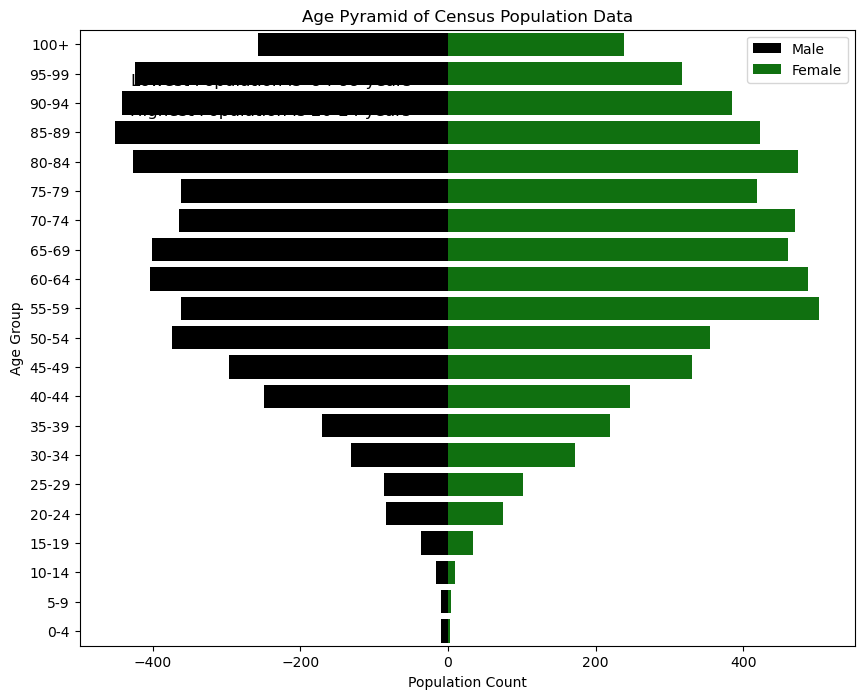

<Figure size 640x480 with 0 Axes>

In [60]:

# Define age bins and age class labels
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, float('inf')]
AgeClass = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']


# Assign 'AgeGroup' to the DataFrame
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=AgeClass, right=False)

# Create age pyramid by counting male and female population per age group
age_pyramid = df.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Reverse male population counts (for pyramid visualization)
age_pyramid['Male'] = -age_pyramid.get('Male', 0)

# Plotting the age pyramid
plt.figure(figsize=(10, 8))

# Plot male population
sns.barplot(x=age_pyramid['Male'], y=age_pyramid.index, color='black', label='Male')

# Plot female population
sns.barplot(x=age_pyramid['Female'], y=age_pyramid.index, color='green', label='Female')

# Set plot labels and title
plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.title('Age Pyramid of Census Population Data')

# Add legend
plt.legend()

# Add text of highest and lowest Population
plt.text(-50, 2, 'Highest Population is 20-24 years', color='black', fontsize=12, ha='right', va='top')
plt.text(-50, 1, 'Lowest Population is  94-99 years', color='black', fontsize=12, ha='right', va='top')

# Show plot
plt.show()

# Save plot to a file
plt.savefig('./Age_Pyramid.png')


In [61]:
# re arrange the pyramid the right way up

C:\Users\hp\AppData\Local\Temp\ipykernel_14904\3260039957.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pyramid[::-1] = df.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

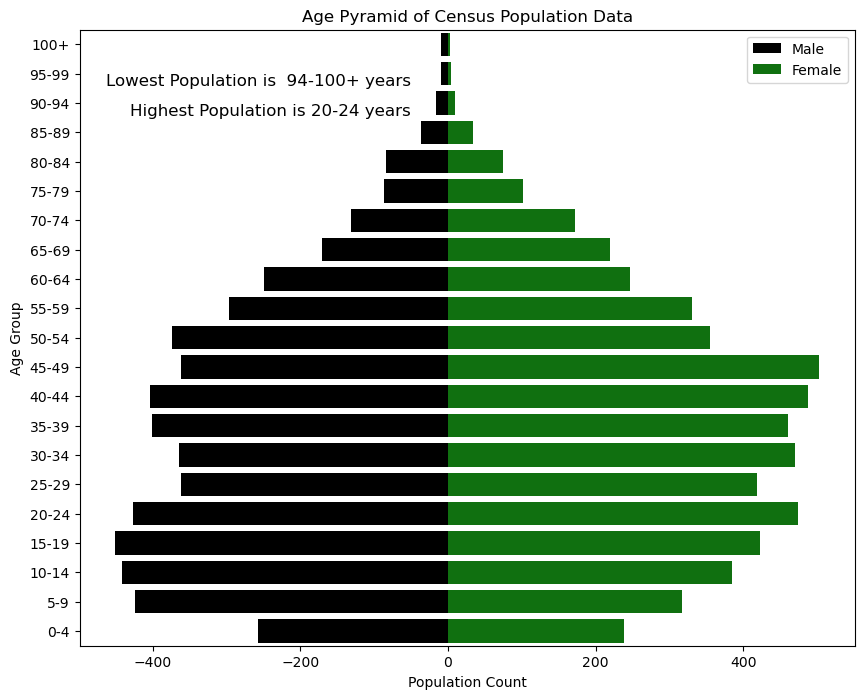

In [62]:

# Define age bins and age class labels
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, float('inf')]
AgeClass = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']


# Assign 'AgeGroup' to the DataFrame
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=AgeClass, right=False)

# Create age pyramid by counting male and female population per age group
age_pyramid[::-1] = df.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)

# Reverse male population counts (for pyramid visualization)
age_pyramid['Male'] = -age_pyramid.get('Male', 0)

# Plotting the age pyramid
plt.figure(figsize=(10, 8))

# Plot male population
sns.barplot(x=age_pyramid['Male'], y=age_pyramid.index, color='black', label='Male')

# Plot female population
sns.barplot(x=age_pyramid['Female'], y=age_pyramid.index, color='green', label='Female')

# Set plot labels and title
plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.title('Age Pyramid of Census Population Data')

# Add legend
plt.legend()

# Add text of highest and lowest Population
plt.text(-50, 2, 'Highest Population is 20-24 years', color='black', fontsize=12, ha='right', va='top')
plt.text(-50, 1, 'Lowest Population is  94-100+ years', color='black', fontsize=12, ha='right', va='top')


# Save plot to a file and use 400 dpi
plt.savefig('./Age_Pyramid.png', dpi=400)

# Show plot
plt.show()


In [63]:
# drop AgeGroup column from dataframe
df.drop(columns=['AgeGroup'], inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11082 non-null  int64 
 1   Street                         11082 non-null  object
 2   First Name                     11082 non-null  object
 3   Surname                        11082 non-null  object
 4   Age                            11082 non-null  int64 
 5   Relationship to Head of House  11082 non-null  object
 6   Marital Status                 11082 non-null  object
 7   Gender                         11082 non-null  object
 8   Occupation                     11082 non-null  object
 9   Infirmity                      11082 non-null  object
 10  Religion                       11082 non-null  object
dtypes: int64(2), object(9)
memory usage: 952.5+ KB


## Visualizations
- The objective of the data visualozations in this section is to explore the information in the census data and to convey information in a simple manner
- The visualizations are expected to provide early insights into the census data
- These visualizations will be mostly 1Dimensional or 2Dimensional. 
- The visualizations will be an attempt at establishing potential relationships between different variables in the census data
- To detect outliers

#### Population Demography
- Create a population demography
- from toddler to centenarian.
- Plot a visualization showing percentage per Age category

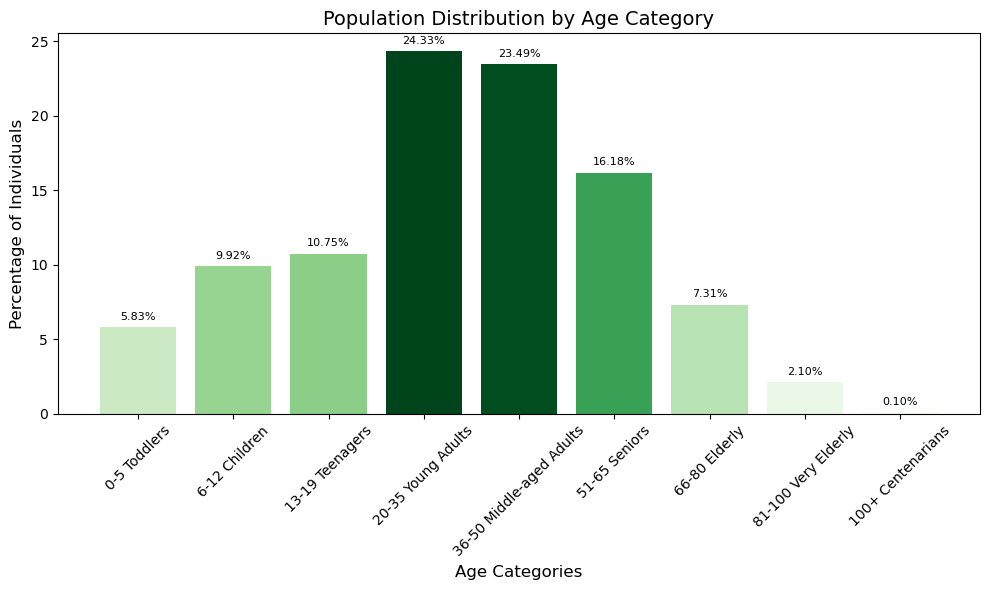

In [65]:
# Define age categories
bins = [0, 5, 12, 19, 35, 50, 65, 80, 100, float('inf')]
labels = ['0-5 Toddlers', '6-12 Children', '13-19 Teenagers', '20-35 Young Adults',
          '36-50 Middle-aged Adults', '51-65 Seniors', '66-80 Elderly',
          '81-100 Very Elderly', '100+ Centenarians']

# Create a new column for age categories
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of individuals in each category
age_distribution = df['Age_Category'].value_counts(normalize=True).sort_index() * 100

# Normalize the values for color intensity
norm = plt.Normalize(age_distribution.min(), age_distribution.max())

# Choose a single color and adjust its alpha based on the normalized value
colors = plt.cm.Greens(norm(age_distribution))

# Plot the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(age_distribution.index, age_distribution, color=colors)

# Add percentage labels on the bars
for bar, percentage in zip(bars, age_distribution):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{percentage:.2f}%', 
             ha='center', fontsize=8)

# Add labels and title
plt.title('Population Distribution by Age Category', fontsize=14)
plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Percentage of Individuals', fontsize=12)
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with 400 DPI quality
plt.savefig('population_demography.png', dpi=400)


# Show the plot
plt.show()


In [66]:
# Calculate the median age
median_age = df['Age'].median()

# Print the median age
print(f'Median Age: {median_age}')


Median Age: 34.0


In [67]:
# Assuming 'Gender' is the column name for gender in your dataset
gender_population = df['Gender'].value_counts()

# Print the population of males and females
print(f'Population of Males: {gender_population.get("Male", 0)}')
print(f'Population of Females: {gender_population.get("Female", 0)}')


Population of Males: 5355
Population of Females: 5727


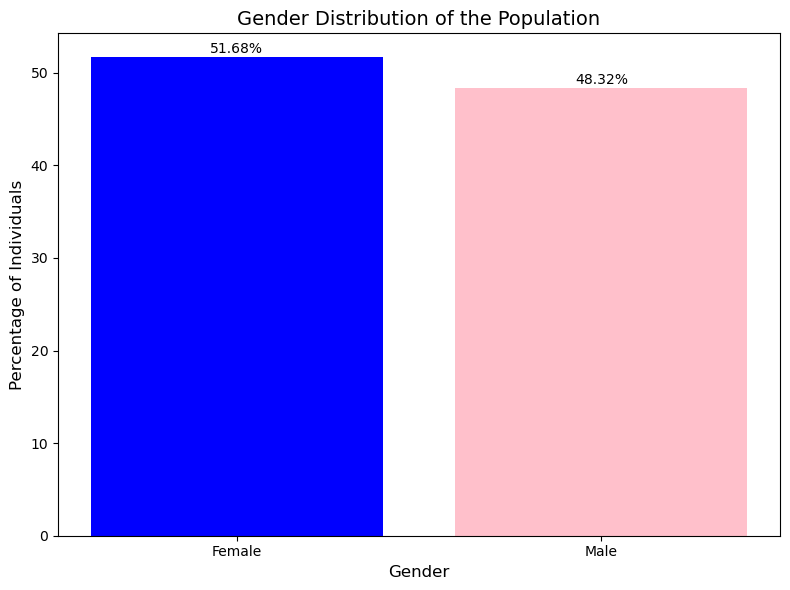

In [68]:
# 'Gender' is the column name for gender in the dataset
gender_population = df['Gender'].value_counts()

# Calculate the population percentages
gender_population_percentage = gender_population / len(df) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_population_percentage.index, gender_population_percentage, color=['blue', 'pink'])

# Add percentage labels on the bars
for bar, percentage in zip(bars, gender_population_percentage):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{percentage:.2f}%', 
             ha='center', fontsize=10)

# Add labels and title
plt.title('Gender Distribution of the Population', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Individuals', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


#### Marital Status Visualization

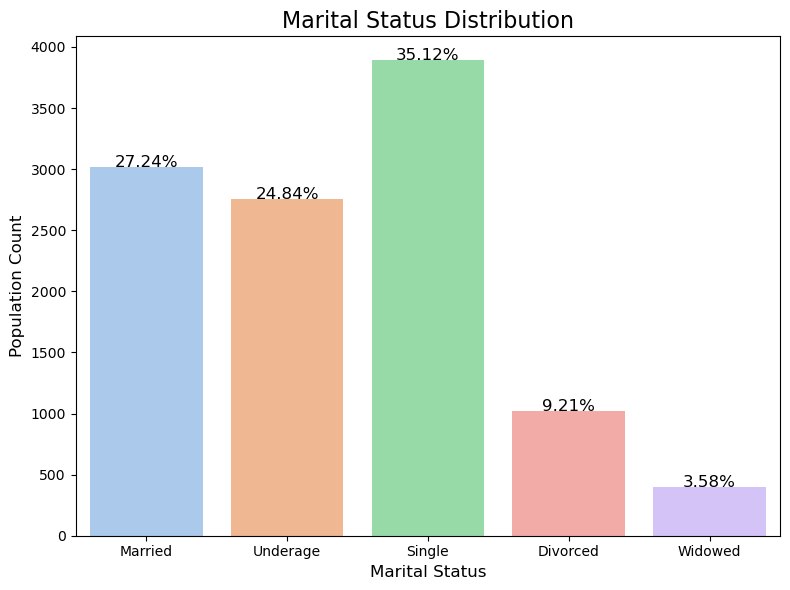

In [69]:
# Plot for Marital status
plt.figure(figsize=(8, 6))

# Create the countplot
sns.countplot(data=df, x='Marital Status', palette='pastel')

# Calculate the percentages for each category
total_count = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{percentage:.2f}%', 
             ha='center', fontsize=12)

# Add labels and title
plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Adjust layout to avoid overlapping text
plt.tight_layout()

# Save the plot with 400 DPI quality
plt.savefig('marital_status_dist.png', dpi=400)

# Show the plot
plt.show()


In [70]:
## Boxplot of Age Distribtuion by Marital Status and Gender 

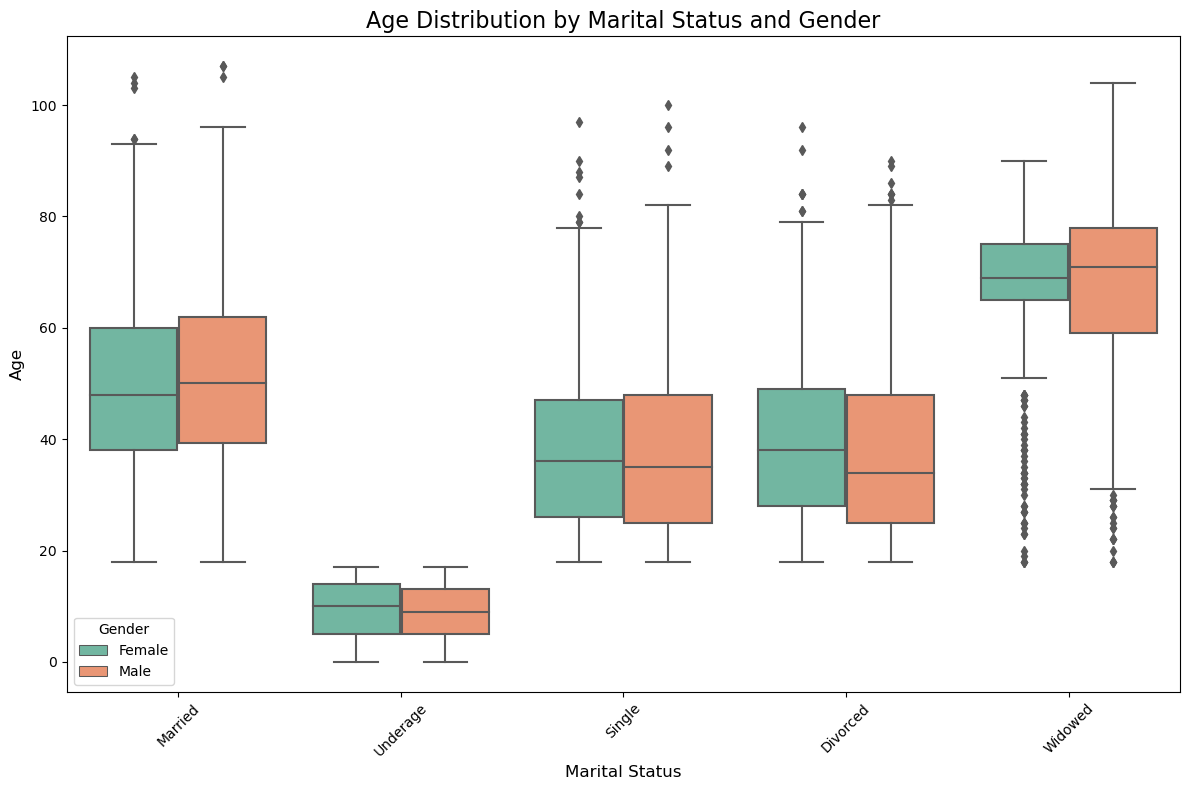

<Figure size 640x480 with 0 Axes>

In [71]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Marital Status', y='Age', hue='Gender', palette='Set2')

# Add plot labels and title
plt.title('Age Distribution by Marital Status and Gender', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show legend and plot
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Save plot to a file
plt.savefig('./Age Distribution by Marital Status and Gender.png')


#### Visualization for Infirmity

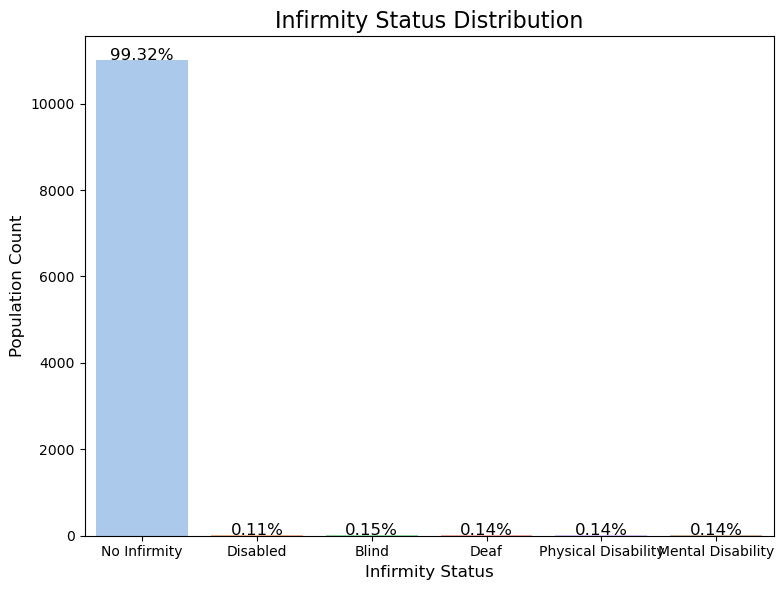

In [72]:
# Plot for Married vs Divorced
plt.figure(figsize=(8, 6))

# Create the countplot
sns.countplot(data=df, x='Infirmity', palette='pastel')

# Calculate the percentages for each category
total_count = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{percentage:.2f}%', 
             ha='center', fontsize=12)

# Add labels and title
plt.title('Infirmity Status Distribution', fontsize=16)
plt.xlabel('Infirmity Status', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Adjust layout to avoid overlapping text
plt.tight_layout()


# Save the plot with 400 DPI quality
plt.savefig('infirmity_status_distribution.png', dpi=400)

# Show the plot
plt.show()

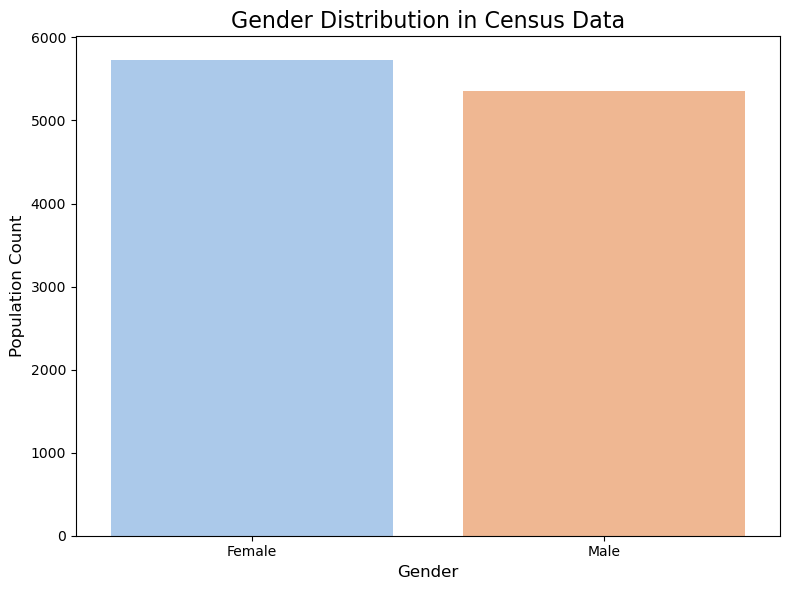

In [73]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Gender', palette='pastel')

# Add labels and title
plt.title('Gender Distribution in Census Data', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

plt.tight_layout()
plt.show()


# Analysis

## Create new Employment Status Column
- Extract Unemployed and Retired workers from 'Occupation' column-
- Examine the average age per Employment Status

In [74]:
# unique features in 'Occupation' column
df['Occupation'].unique()

array(['Firefighter', 'Engineer, petroleum', 'Child', ...,
       'Retired Video editor', 'Retired Site engineer', 'Retired Copy'],
      dtype=object)

In [75]:
# Get the count of features in 'Occupation' column
occupation_counts = df['Occupation'].value_counts()

# Display all rows of the result
with pd.option_context('display.max_rows', None):  # Adjust to show all rows
    print(occupation_counts)


Occupation
Student                                                                2251
Unemployed                                                              743
University Student                                                      710
Child                                                                   646
PhD Student                                                              27
Make                                                                     20
Programmer, multimedia                                                   17
Accountant, chartered                                                    17
Museum/gallery conservator                                               17
Insurance account manager                                                17
Visual merchandiser                                                      17
Optometrist                                                              17
Dancer                                                                   16
S

In [76]:
def categorize_employment(occupation):
    """
    Categorizes employment based on the occupation string.
    """
    if 'Student' in occupation and 'University' not in occupation and 'PhD' not in occupation:
        return 'Student'
    elif 'University Student' in occupation or 'PhD Student' in occupation:
        return 'University Student'
    elif 'Child' in occupation:
        return 'Child'
    elif 'Retired' in occupation:
        return 'Retired'
    elif 'Unemployed' in occupation:
        return 'Unemployed'
    else:
        return 'Employed'

# Apply the function to create a new 'Employment' column
df['Employment Status'] = df['Occupation'].apply(categorize_employment)

# Display the first few rows to verify
print(df[['Occupation', 'Employment Status']].head())


            Occupation Employment Status
0          Firefighter          Employed
1  Engineer, petroleum          Employed
2                Child             Child
3       Cytogeneticist          Employed
4           Bookseller          Employed


In [77]:
# Count and percentage distribution
employment_status_counts = df['Employment Status'].value_counts()
employment_status_percentage = df['Employment Status'].value_counts(normalize=True) * 100

# Display counts and percentages
employment_status_summary = pd.DataFrame({
    'Count': employment_status_counts,
    'Percentage': employment_status_percentage.round(2).astype(str) + '%'
})

print(employment_status_summary)


                    Count Percentage
Employment Status                   
Employed             5895     53.19%
Student              2251     20.31%
Retired               801      7.23%
Unemployed            743       6.7%
University Student    737      6.65%
Child                 655      5.91%


In [78]:
# Calculate average age for each employment status
average_employment_status_age = df.groupby('Employment Status')['Age'].mean()

# Display the result
print(average_employment_status_age)


Employment Status
Child                  2.746565
Employed              42.673961
Retired               76.337079
Student               11.632163
Unemployed            43.228802
University Student    20.510176
Name: Age, dtype: float64


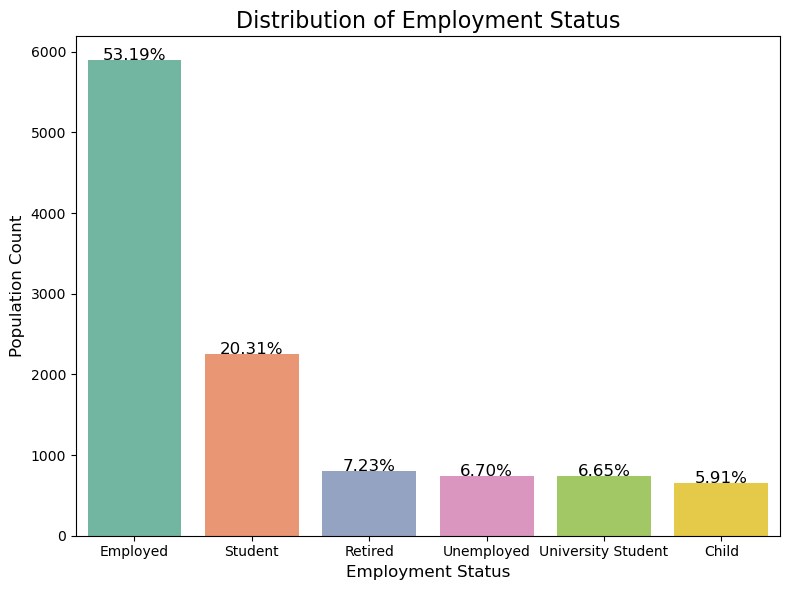

In [79]:
# create a bar chart visualization for employement status

# Calculate the percentage for each Employment Status
employment_counts = df['Employment Status'].value_counts(normalize=True) * 100

# Convert to a DataFrame for easier indexing
employment_counts_df = employment_counts.reset_index()
employment_counts_df.columns = ['Employment Status', 'Percentage']

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Employment Status', data=df, palette='Set2', order=employment_counts.index)

# Add percentage labels to the bars
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{percentage:.2f}%', 
             ha='center', fontsize=12)

# Set plot labels and title
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.title('Distribution of Employment Status', fontsize=16)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with 300 DPI quality
plt.savefig('employement_status_distribution.png', dpi=300)

# Show the plot
plt.show()


## Infer and Extract those who are likely to be 'Commuters'
- Infer from the columns those who are likely to be commuters
- Create a new column for commuters and non-commuters
- Extract list of occupations thought to be 'white-collar'

In [80]:
# Create a list of white collar jobs from 'Occupation' column
white_collar_jobs = [
    "Accountant, chartered",
    "Applications developer",
    "Chief Operating Officer",
    "Computer games developer",
    "Data scientist",
    "Designer, interior/spatial",
    "Financial controller",
    "Human resources officer",
    "Software engineer",
    "Network engineer",
    "Legal secretary",
    "Sales executive",
    "Public relations account executive",
    "Clinical psychologist",
    "Pharmacist",
    "Biomedical scientist",
    "Project manager",
    "Recruitment consultant",
    "Research officer, trade union",
    "Solicitor, Scotland",
    "English as a foreign language teacher",
    "Technical author",
    "Translator",
    "Web designer"
]

white_collar_jobs_2 = [
    "Estate agent",
    "Scientist, clinical (histocompatibility and immunogenetics)",
    "Cartographer",
    "Diagnostic radiographer",
    "Intelligence analyst",
    "Scientist, product/process development",
    "Veterinary surgeon",
    "Lecturer, further education",
    "Surveyor, building",
    "Energy engineer",
    "IT trainer",
    "Marketing executive",
    "Naval architect",
    "Lobbyist",
    "Surveyor, quantity",
    "Product designer",
    "Financial manager",
    "Insurance broker",
    "Engineer, control and instrumentation",
    "Video editor",
    "Product/process development scientist",
    "Scientist, research (maths)",
    "Market researcher",
    "Chartered accountant",
    "Forensic scientist",
    "Corporate treasurer",
    "Water engineer",
    "Doctor, hospital",
    "Petroleum engineer",
    "Pharmacist, hospital",
    "Chartered public finance accountant",
    "Research officer, government",
    "Copywriter, advertising",
    "Media planner",
    "Environmental consultant",
    "Historic buildings inspector/conservation officer",
    "Civil Service administrator",
    "Personal assistant",
    "Research officer, political party",
    "Risk analyst",
    "Banker",
    "Food technologist",
    "Fashion designer",
    "Ophthalmologist",
    "Lawyer",
    "Clinical embryologist",
    "Higher education lecturer",
    "Company secretary",
    "Systems developer",
    "Quality manager",
    "Regulatory affairs officer",
    "Physiotherapist",
    "Microbiologist",
    "Pilot, airline"
]

white_collar_jobs_3 = [
    "Engineer, agricultural",
    "Engineer, civil (consulting)",
    "Archivist",
    "Systems analyst",
    "Magazine features editor",
    "Counselling psychologist",
    "Management consultant",
    "Tax adviser",
    "Chief Executive Officer",
    "Scientist, marine",
    "Environmental manager",
    "Scientist, research (medical)",
    "Higher education careers adviser",
    "Pensions consultant",
    "Financial risk analyst",
    "Oceanographer",
    "Patent examiner",
    "Geographical information systems officer",
    "Museum/gallery exhibitions officer",
    "Water quality scientist",
    "General practice doctor",
    "Psychologist, sport and exercise",
    "Geochemist",
    "Educational psychologist",
    "Meteorologist",
    "Agricultural consultant",
    "Engineer, energy",
    "Writer",
    "Chief Strategy Officer",
    "Research scientist (maths)",
    "Research scientist (physical sciences)",
    "Financial planner",
    "Chemical engineer",
    "Dentist",
    "Marine scientist",
    "Structural engineer",
    "Architect",
    "Barrister",
    "Science writer",
    "Hospital pharmacist",
    "Animal nutritionist",
    "Engineering geologist",
    "Research scientist (life sciences)",
    "Interpreter",
    "Psychologist, counselling",
    "Mining engineer",
    "Occupational psychologist",
    "Electrical engineer",
    "Journalist, magazine",
    "Architectural technologist",
    "Chartered legal executive (England and Wales)",
    "Aeronautical engineer",
    "Advertising copywriter",
    "Psychologist, prison and probation services",
    "Scientist, research (life sciences)",
    "Engineer, manufacturing systems",
    "Facilities manager",
    "Medical laboratory scientific officer",
    "Editor, film/video",
    "Chief Financial Officer",
    "Archaeologist",
    "Scientist, biomedical",
    "Operational researcher",
    "Patent attorney",
    "Social worker",
    "Biomedical engineer",
    "Therapist, art",
    "Engineer, aeronautical",
    "Mechanical engineer",
    "Licensed conveyancer",
    "Health service manager",
    "Public relations officer",
    "IT sales professional",
    "Environmental health practitioner",
    "Advertising account planner",
    "Information systems manager",
    "Engineer, technical sales",
    "Surgeon",
    "Quantity surveyor",
    "Biochemist, clinical",
    "Production manager",
    "Telecommunications researcher",
    "Psychotherapist, child",
    "Merchant navy officer",
    "Building services engineer",
    "Chartered certified accountant",
    "Psychotherapist",
    "IT consultant"
]

white_collar_jobs_4 = [
    "Scientist, physiological",
    "Associate Professor",
    "Multimedia programmer",
    "Development worker, international aid",
    "Education administrator",
    "Trade mark attorney",
    "Engineer, structural",
    "Research scientist (medical)",
    "Further education lecturer",
    "Conservation officer, historic buildings",
    "Engineer, mining",
    "Scientist, forensic",
    "Statistician",
    "Solicitor",
    "Scientist, research (physical sciences)",
    "Pathologist",
    "Information officer",
    "Commercial art gallery manager",
    "Engineer, chemical",
    "Legal executive",
    "Health and safety inspector",
    "Transport planner",
    "Academic librarian",
    "Database administrator",
    "Chartered management accountant",
    "Commissioning editor",
    "Nutritional therapist",
    "Rural practice surveyor",
    "Television/film/video producer",
    "Corporate investment banker",
    "Electronics engineer",
    "Speech and language therapist",
    "Control and instrumentation engineer",
    "Astronomer",
    "Therapist, sports",
    "Engineer, civil (contracting)",
    "Toxicologist",
    "Pension scheme manager",
    "Advertising account executive",
    "Chief Marketing Officer",
    "Materials engineer",
    "Air traffic controller",
    "Armed forces technical officer"
]

# the lists are named as follows:
# white_collar_jobs_1, white_collar_jobs_2, white_collar_jobs_3, white_collar_jobs_4

all_white_collar_jobs = (
    white_collar_jobs_2 +
    white_collar_jobs_3 +
    white_collar_jobs_4
)

# remove duplicates and sort the list
all_white_collar_jobs = sorted(set(all_white_collar_jobs))

# Print the merged list
print(all_white_collar_jobs)


['Academic librarian', 'Advertising account executive', 'Advertising account planner', 'Advertising copywriter', 'Aeronautical engineer', 'Agricultural consultant', 'Air traffic controller', 'Animal nutritionist', 'Archaeologist', 'Architect', 'Architectural technologist', 'Archivist', 'Armed forces technical officer', 'Associate Professor', 'Astronomer', 'Banker', 'Barrister', 'Biochemist, clinical', 'Biomedical engineer', 'Building services engineer', 'Cartographer', 'Chartered accountant', 'Chartered certified accountant', 'Chartered legal executive (England and Wales)', 'Chartered management accountant', 'Chartered public finance accountant', 'Chemical engineer', 'Chief Executive Officer', 'Chief Financial Officer', 'Chief Marketing Officer', 'Chief Strategy Officer', 'Civil Service administrator', 'Clinical embryologist', 'Commercial art gallery manager', 'Commissioning editor', 'Company secretary', 'Conservation officer, historic buildings', 'Control and instrumentation engineer'

In [81]:
# Define white-collar jobs and other commuter-indicative categories

commuter_categories = all_white_collar_jobs + ['University Student', 'PhD Student']

# Create a column indicating if the individual is a commuter
df['Commuter'] = df['Occupation'].apply(lambda x: x in commuter_categories)

# Calculate the percentage of commuters
total_commuters = df['Commuter'].sum()
percentage_commuters = (total_commuters / len(df)) * 100

# Display the result
print(f"Total commuters: {total_commuters}")
print(f"Percentage of commuters: {percentage_commuters:.2f}%")


Total commuters: 2152
Percentage of commuters: 19.42%


In [82]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Category,Employment Status,Commuter
0,1,Aberdeen Road,Katherine,Clayton,33,Head,Married,Female,Firefighter,No Infirmity,Christian,20-35 Young Adults,Employed,False
1,1,Aberdeen Road,Carl,Clayton,34,Husband,Married,Male,"Engineer, petroleum",No Infirmity,No Religion,20-35 Young Adults,Employed,False
2,1,Aberdeen Road,Kieran,Clayton,2,Son,Underage,Male,Child,No Infirmity,No Religion,0-5 Toddlers,Child,False
3,1,Aberdeen Road,Danny,Brown,53,Lodger,Single,Male,Cytogeneticist,No Infirmity,No Religion,51-65 Seniors,Employed,False
4,1,Aberdeen Road,Mandy,Wilson,23,Lodger,Single,Female,Bookseller,No Infirmity,No Religion,20-35 Young Adults,Employed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11077,228,Unity Lane,Sam,Roberts,57,Husband,Married,Male,"Engineer, broadcasting (operations)",No Infirmity,No Religion,51-65 Seniors,Employed,False
11078,228,Unity Lane,Nathan,Roberts,22,Son,Widowed,Male,University Student,No Infirmity,No Religion,20-35 Young Adults,University Student,True
11079,229,Unity Lane,Teresa,Greenwood,37,Head,Married,Female,Contractor,No Infirmity,Christian,36-50 Middle-aged Adults,Employed,False
11080,229,Unity Lane,Anthony,Greenwood,37,Husband,Married,Male,Unemployed,No Infirmity,Christian,36-50 Middle-aged Adults,Unemployed,False


## Birth Rate and Death Rate 
- In this analysis, I will calcualte the birth rate
- Also, I will calculate the birth rate per 1,000.
- I will calculate evolving birth rates. 
- I will do the same for death rate

In [83]:
# subsetting children aged zero as live births or new borns
age_zero = len(df[df['Age'] == 0])
print('The number of children aged zero is:', age_zero)

The number of children aged zero is: 107


- According to the office for National Statistics in the United Kingdom, for England and Wales, women of childbearing age or otherwise known as fertile are between the ages of 15-45.
- https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/conceptionandfertilityrates/bulletins/childbearingforwomenbornindifferentyearsenglandandwales/2020

In [84]:
# subsetting women between age 15 & 45 
women_15_45 = len(df[(df['Age'] > 15) & (df['Age'] < 45) & (df['Gender'] == 'Female')])
print('The number of women between age 15 and 45 is:', women_15_45)

The number of women between age 15 and 45 is: 2660


# Calculating Birth rate and Fertility Rate per 1000 based on assumptions

In [85]:
# Input data to analyze
total_population = len(df)
new_born_children = len(df[df['Age'] == 0])
print(f'The total number of new borns in the population is: {new_born_children}')

# Calculations for birth rate and fertility rate per 1000
birth_rate = (new_born_children / total_population) * 1000 # 1000 is the standard unit for measuring birth rates
fertility_rate = (new_born_children / women_15_45) * 1000

# Displaying the results
print(f"Birth Rate per 1000: {birth_rate:.2f}%")
print(f"Fertility Rate per 1000: {fertility_rate:.2f}%")

The total number of new borns in the population is: 107
Birth Rate per 1000: 9.66%
Fertility Rate per 1000: 40.23%


## Death Rate 
- According to th Office for National Statistics
- Calculate the number of people that have died using United Kingdom Life Expectancy for 2020-2022.
- Average Life Expectancy for the United Kingdom at birth is 78.6 for males and 82.6 for females
- The weighted life expectancy is 80.67 years
- My death rate calculation will begin from 81 years upward.
- https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/lifeexpectancies/bulletins/nationallifetablesunitedkingdom/2020to2022


- Compute the death rate per annum between these two groups.
- 81-85 & 86-90
- I am assuming the ages of those 86-90 is the same when they were 5 years younger - 81-85
- I am assumming that 86-90 had as many people in it five years ago as the current number in age range 81-85


In [86]:
total_population = len(df)

death_rate = len(df[(df['Age'] > 81) & (df['Age'] < 85)])
print('The number of people between age 81 and 85 is:', death_rate)

death_rate_2 = len(df[(df['Age'] > 86) & (df['Age'] < 90)])
print('The number of people between age 86 and 90 is:', death_rate_2)

# The death rate per 100,000
death_rate_difference = round( death_rate - death_rate_2)
print('The population difference between 81-85 and 86-90 is:', death_rate_difference)

# death difference per year over 5 years 
annual_death_difference = death_rate_difference / 5
print('The death difference per year :', annual_death_difference)

# Calculate death rate per 1000
death_r = round ((annual_death_difference / total_population ) * 1000)
print('The death rate per 1000 over 5 years is:', death_r)

The number of people between age 81 and 85 is: 83
The number of people between age 86 and 90 is: 32
The population difference between 81-85 and 86-90 is: 51
The death difference per year : 10.2
The death rate per 1000 over 5 years is: 1


- Compute the death rate per annum between these two groups.
- 91-95 & 96-100
- I am assuming the ages of those 96-100 is the same when they were 5 years younger - 91-95
- I am also assumming that 96-100 had as many people in it five years ago as the current number in age range 91-95

In [87]:
total_population = len(df)

death_rate_3 = len(df[(df['Age'] > 91) & (df['Age'] < 95)])
print('The number of people between age 91 and 95 is:', death_rate_3)

death_rate_4 = len(df[(df['Age'] > 96) & (df['Age'] < 100)])
print('The number of people between age 96 and 100 is:', death_rate_4)

# The death rate per 100,000
death_rate_difference2 = round( death_rate_3 - death_rate_4)
print('The population difference between 91-95 and 96-100 is:', death_rate_difference2)

# death difference per year over 5 years 
annual_death_difference2 = death_rate_difference2 / 5
print('The death difference per year over 5 years:', annual_death_difference2)

# Calculate death rate per 1000
death_r_2 = round ((annual_death_difference2 / total_population ) * 1000)
print('The death rate per 1000 over 5 years is:', death_r_2)

The number of people between age 91 and 95 is: 10
The number of people between age 96 and 100 is: 3
The population difference between 91-95 and 96-100 is: 7
The death difference per year over 5 years: 1.4
The death rate per 1000 over 5 years is: 0


## Calculation for Housing Density by examing Level of Occupancy

In [88]:
# Create a unique identifier for each house using 'House Number' and 'Street'
df['House Identifier'] = df['House Number'].astype(str) + ' ' + df['Street']

# Calculate the total number of unique houses
total_houses = df['House Identifier'].nunique()

# Display the result
print(f"The total number of houses in the town is {total_houses}.")


The total number of houses in the town is 3701.


In [89]:
# Group by 'House Number' and 'Street' to identify unique households
household_occupants = df.groupby(['House Number', 'Street']).size()

# Convert to a DataFrame for better readability
household_occupants = household_occupants.reset_index(name='Occupants')

# Display the first few rows of the result
print(household_occupants)

      House Number            Street  Occupants
0                1     Aberdeen Road          5
1                1      Anglia Drive          2
2                1  Barber Longhouse          4
3                1    Bathhouse Lane          2
4                1       Beaver Lane          4
...            ...               ...        ...
3696           225        Unity Lane          3
3697           226        Unity Lane          3
3698           227        Unity Lane          3
3699           228        Unity Lane          3
3700           229        Unity Lane          3

[3701 rows x 3 columns]


In [90]:
# Calculate the average number of individuals per house
average_occupants_per_house = household_occupants['Occupants'].mean()

# Display the result
print(f"The average number of individuals per house is: {average_occupants_per_house:.2f}")


The average number of individuals per house is: 2.99


- Calculating the difference between the average occupancy and the number of people who are actually
living in a given house.

In [91]:
# Group by 'House Number' and 'Street' to identify unique households
household_occupants = df.groupby(['House Number', 'Street']).size()

# Convert to a DataFrame for better readability
household_occupants = household_occupants.reset_index(name='Occupants')

# Display the first few rows of the result
print(household_occupants.head())

# Calculate the average number of individuals per house
average_occupants_per_house = household_occupants['Occupants'].mean()

# Display the result
print(f"The average number of individuals per house is: {average_occupants_per_house:.2f}")

# Calculate the difference between actual occupancy and average occupancy per house
household_occupants['Occupancy Difference'] = household_occupants['Occupants'] - average_occupants_per_house

# Display the differences
household_occupants[['House Number', 'Street', 'Occupants', 'Occupancy Difference']].head()


   House Number            Street  Occupants
0             1     Aberdeen Road          5
1             1      Anglia Drive          2
2             1  Barber Longhouse          4
3             1    Bathhouse Lane          2
4             1       Beaver Lane          4
The average number of individuals per house is: 2.99


,House Number,Street,Occupants,Occupancy Difference
0,1,Aberdeen Road,5,2.005674
1,1,Anglia Drive,2,-0.994326
2,1,Barber Longhouse,4,1.005674
3,1,Bathhouse Lane,2,-0.994326
4,1,Beaver Lane,4,1.005674


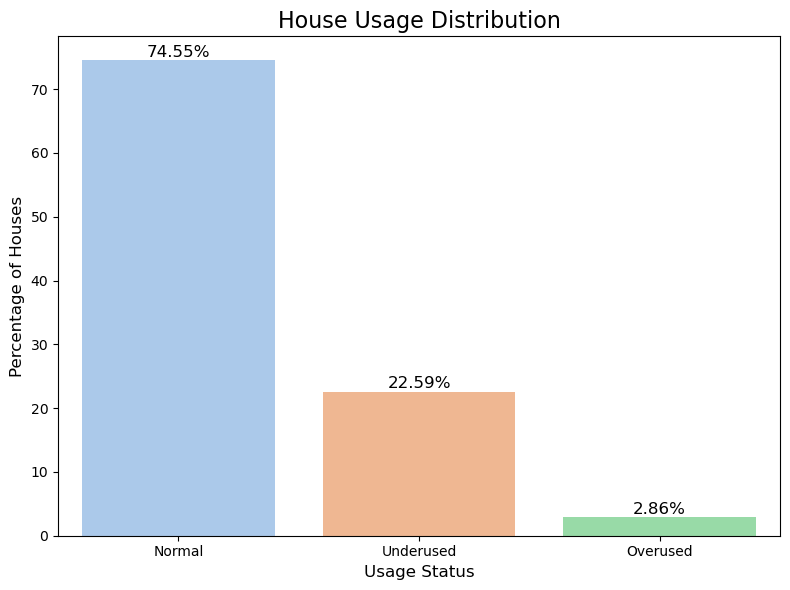

In [92]:

# Group by 'House Number' and 'Street' to count the number of residents per house
house_residents = df.groupby(['House Number', 'Street']).size().reset_index(name='Resident Count')

# Define thresholds (example: underused < 2 residents, overused > 6 residents)
underused_threshold = 2
overused_threshold = 6

# Classify each house based on resident count
house_residents['Usage Status'] = house_residents['Resident Count'].apply(
    lambda x: 'Underused' if x < underused_threshold else 
              'Overused' if x > overused_threshold else 'Normal'
)

# Calculate the percentage of each usage status
usage_counts = house_residents['Usage Status'].value_counts(normalize=True) * 100

# Convert to DataFrame for plotting
usage_counts_df = usage_counts.reset_index()
usage_counts_df.columns = ['Usage Status', 'Percentage']

# Plot the percentages as a barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=usage_counts_df, x='Usage Status', y='Percentage', palette='pastel')

# Add percentage labels on the bars
for i, row in usage_counts_df.iterrows():
    plt.text(i, row['Percentage'] + 0.5, f"{row['Percentage']:.2f}%", ha='center', fontsize=12)

# Add labels and title
plt.title('House Usage Distribution', fontsize=16)
plt.xlabel('Usage Status', fontsize=12)
plt.ylabel('Percentage of Houses', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with 400 DPI quality
plt.savefig('house_distribution.png', dpi=400)

# show the plot
plt.show()


## Calculate the rate of divorced and married invididuals

In [93]:
# Total population
total_population = len(df)

# Calculate the number of married and divorced individuals
married_count = df[df['Marital Status'] == 'Married'].shape[0]
divorced_count = df[df['Marital Status'] == 'Divorced'].shape[0]

print(f'The number of marriages in the towns population: {married_count}')
print(f'The number of divorcees in the towns population: {divorced_count}')

# Calculate the marriage and divorce rates
marriage_rate = (married_count / total_population) * 100 # to get the percentage 
divorce_rate = (divorced_count / total_population) * 100 # to get the percentage

# Display the results
print(f"The estimated Marriage Rate for the Town is: {marriage_rate:.2f}%")
print(f"The estimated Divorce Rate for the Town is: {divorce_rate:.2f}%")


The number of marriages in the towns population: 3019
The number of divorcees in the towns population: 1021
The estimated Marriage Rate for the Town is: 27.24%
The estimated Divorce Rate for the Town is: 9.21%


### Religious Affiliation

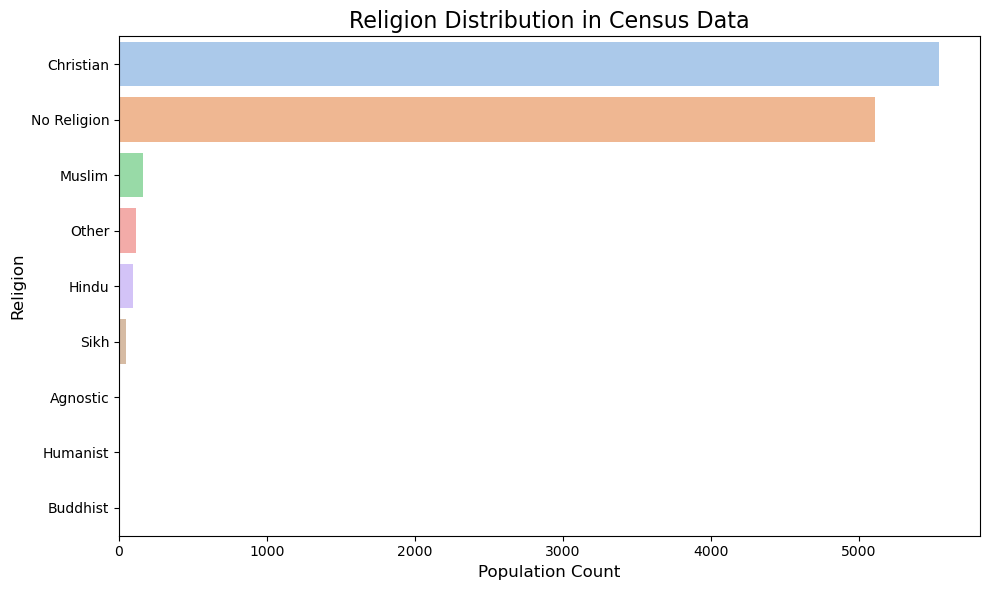

The percentage per Religion is:
Christian: 50.01%
No Religion: 46.11%
Muslim: 1.48%
Other: 1.05%
Hindu: 0.85%
Sikh: 0.43%
Agnostic: 0.05%
Humanist: 0.02%
Buddhist: 0.01%


In [94]:
# visualization Analysis for Religion

# Count the number of people in each religion
religion_counts = df['Religion'].value_counts()

# Plot the religion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=religion_counts.values, y=religion_counts.index, palette='pastel')
plt.title('Religion Distribution in Census Data', fontsize=16)
plt.xlabel('Population Count', fontsize=12)
plt.ylabel('Religion', fontsize=12)
plt.tight_layout()

# Save plot as high-resolution image
plt.savefig('./religion_distribution.png', dpi=300)
plt.show()

# Analyze percentage representation
religion_percentages = (religion_counts / len(df)) * 100

# Print the percentage per religion with proper formatting
print("The percentage per Religion is:")
for religion, percentage in religion_percentages.items():
    print(f"{religion}: {percentage:.2f}%")



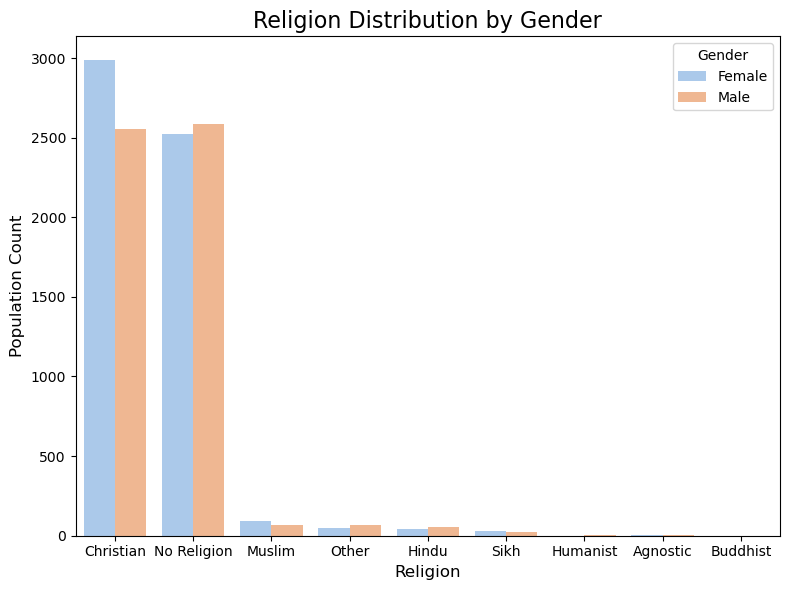

In [95]:
# Countplot Visualization of Religion

plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Religion', palette='pastel', hue='Gender')

# Add labels and title
plt.title('Religion Distribution by Gender', fontsize=16)
plt.xlabel('Religion', fontsize=12)
plt.ylabel('Population Count', fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with 300 DPI quality
plt.savefig('religion_distribution_gender.png', dpi=300)

# show the plot
plt.show()


- Infer trends by identifying newer or less common religions with significant numbers.
- Use age demographics to estimate potential future growth (e.g., younger populations may indicate growth potential).
- Look for smaller or emerging religions with noticeable populations.
- Analyze their age distribution:
- A younger population for a religion may indicate it's growing.

In [96]:
# Identify newer or growing religions (e.g., religions with younger age groups)
# Example: Find average age per religion
avg_age_per_religion = df.groupby('Religion')['Age'].mean().sort_values()
print(round(avg_age_per_religion))

Religion
Humanist       18.0
Other          24.0
Buddhist       28.0
Muslim         30.0
Hindu          31.0
No Religion    33.0
Sikh           37.0
Agnostic       38.0
Christian      38.0
Name: Age, dtype: float64


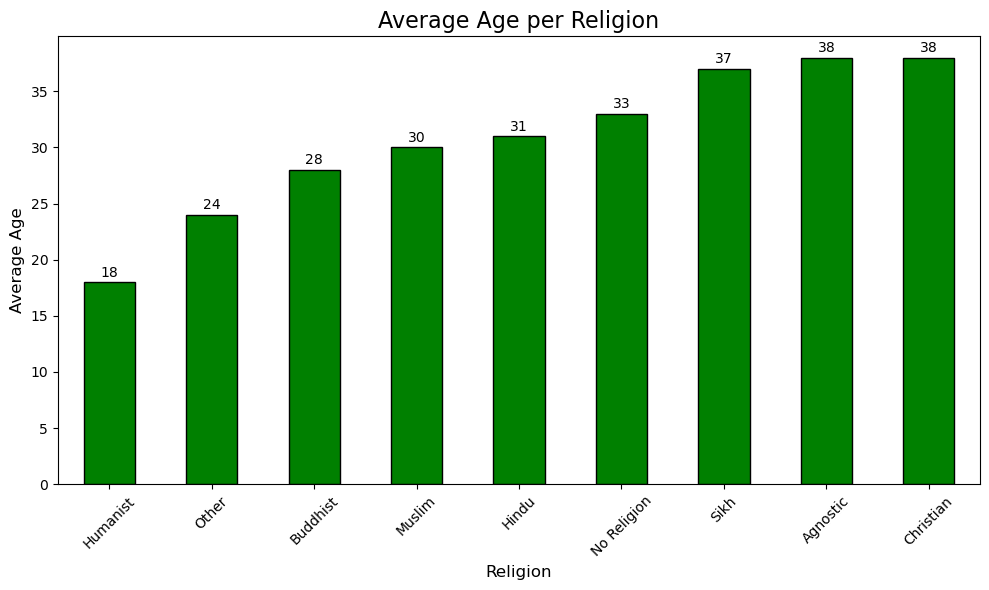

In [97]:
# Average Age per Religion

# Round the average ages for clarity
avg_age_per_religion = avg_age_per_religion.round()

# Plot the graph
plt.figure(figsize=(10, 6))
bars = avg_age_per_religion.plot(kind='bar', color='green', edgecolor='black')

# Add average age as labels on the bars
for index, value in enumerate(avg_age_per_religion):
    plt.text(index, value + 0.5, f'{value:.0f}', ha='center', fontsize=10)

# Add labels and title
plt.title('Average Age per Religion', fontsize=16)
plt.xlabel('Religion', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.xticks(rotation=45)

# tight layout for better spacing
plt.tight_layout()

# Save plot as high-resolution image
plt.savefig('./average_age_religion.png', dpi=300)

# display the plot
plt.show()



- Youthful Religions:
Humanism, Buddhism, and the "Other" category have younger demographics, signaling potential growth and modern appeal.

- Established Religions:
Christianity and Sikhism have older populations, indicating stability but potential decline without younger adherents.

- Secular Shifts:
The "No Religion" group is relatively young, suggesting secularism's continuing rise among future generations.

#### Future Trends:
- Religions with younger populations (Humanist, Muslim, Hindu) are likely to grow and influence societal norms.
Older groups (Christianity, Agnosticism) may experience stagnation or decline without younger converts.

#### Community Impact:
- Younger religions and secular groups may drive shifts in education, cultural events, and policies.
Established religions may focus on preserving traditions while adapting to modern contexts.

# Old age care analysis.
- If there is evidence that there will be an increased number of retired people in
future years, the town will need to allocate more funding for end-of-life care
- In the United Kingdom, Elderly Age begins from 65 according to the Office for National Statistics
- https://www.bing.com/ck/a?!&&p=9e576cbe2e74528809386a49eb5800041c09f96794628ae04ba9d43dd45625d9JmltdHM9MTczNTE3MTIwMA&ptn=3&ver=2&hsh=4&fclid=1e8de7f8-46be-627d-0a8e-f371470763a1&psq=what+age+does+elderly+begin+in+the+Uk&u=a1aHR0cHM6Ly93d3cub25zLmdvdi51ay9wZW9wbGVwb3B1bGF0aW9uYW5kY29tbXVuaXR5L2JpcnRoc2RlYXRoc2FuZG1hcnJpYWdlcy9hZ2VpbmcvYXJ0aWNsZXMvbGl2aW5nbG9uZ2VyaXNhZ2U3MHRoZW5ld2FnZTY1LzIwMTktMTEtMTkvcGRm&ntb=1

- Based on the data from the Office for National Statistics
- Census 2021 Data shows population continues to age.
- According to the Office for National Statistics, The number of people aged 65 years and over increased from 9.2 million in 2011 to over 11 million in 2021 and the proportion of people aged 65 years and over rose from 16.4% to 18.6%.
- A 2.2% increase. 

In [98]:
# calculate the total number of individuals aged 51 upwards
aged_51 = df[df['Age'] > 51]
print('The total number of people aged 51 upwards is:', len(aged_51))

# calculate the total number of individuals aged 50 downwards
aged_50 = df[df['Age'] < 51]
print('The total number of people aged 50 downwards is:', len(aged_50))

The total number of people aged 51 upwards is: 2554
The total number of people aged 50 downwards is: 8391


## Calcuation for immigration and Emigration

In [99]:
# Calculate the total population
total_population = len(df)

# Count lodgers and visitors
num_lodgers_visitors = df[df["Relationship to Head of House"].isin(["Lodger", "Visitor"])].shape[0]

print(f"Number of lodgers or visitors: {num_lodgers_visitors}")

# Calculate the percentage
percentage_lodgers_visitors = (num_lodgers_visitors / total_population) * 100

# Display the result
print(f"The number of lodgers or visitors in the total population is {num_lodgers_visitors}.")
print(f"The percentage of lodgers or visitors in the total population is {percentage_lodgers_visitors:.2f}%.")


Number of lodgers or visitors: 1264
The number of lodgers or visitors in the total population is 1264.
The percentage of lodgers or visitors in the total population is 11.41%.


In [100]:
# Calculate the total population
total_population = len(df)

# Count divorcees
num_divorcees = df[df["Marital Status"] == "Divorced"].shape[0]

print(f"Number of divorcees: {num_divorcees}")

# Calculate the percentage
percentage_divorcees = (num_divorcees / total_population) * 100

# Display the result
print(f"The number of divorcees in the total population is {num_divorcees}.")
print(f"The percentage of divorcees in the total population is {percentage_divorcees:.2f}%.")


Number of divorcees: 1021
The number of divorcees in the total population is 1021.
The percentage of divorcees in the total population is 9.21%.


In [101]:
# ensure all relevant columns are present
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age_Category',
       'Employment Status', 'Commuter', 'House Identifier'],
      dtype='object')